In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
#Data Cleaning
df = pd.read_csv('PTSD-BPD.csv')
df = df[['PD_Traits','MAS S','MAS O','MAS D','MAS M']]
#df = df.dropna()
#df = df[df['MAS S'] != 999]
#Metacog = df['MAS S'] + df['MAS O'] + df['MAS D'] + df['MAS M']
#df['Metacog'] = Metacog
#df.to_csv('PTSD-cleaned.csv')

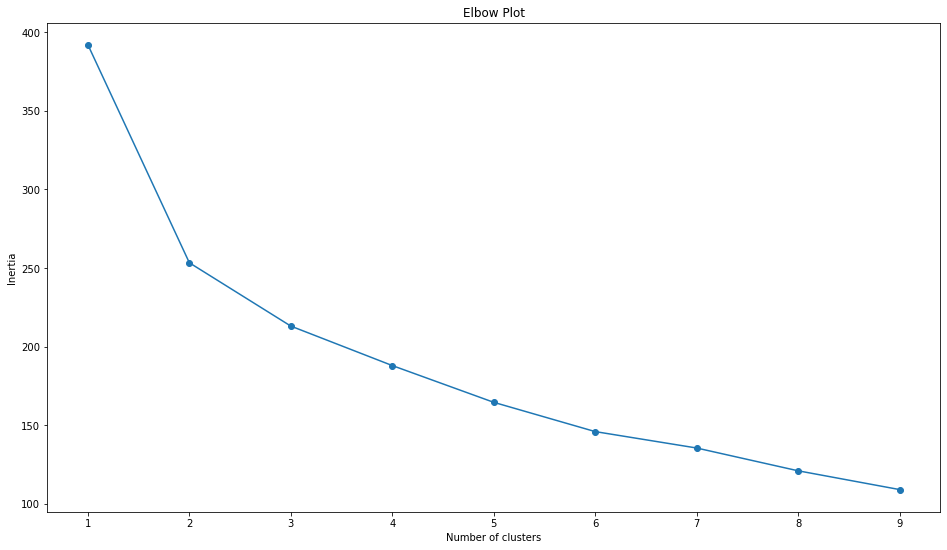

In [5]:
#Elbow Plot
#read in data
data=pd.read_csv("PTSD-cleaned.csv")
#get basic statistics on data    
    #data.describe()
#standardize the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
    #pd.DataFrame(data_scaled).describe()
#Determining inertia values for a range of differnt clusters and 
##storing them into a single list (range is modifiable)

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

elbow_frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(16,9))
plt.plot(elbow_frame['Cluster'], elbow_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()
#Base your ideal cluster number (or range) off of this elbow plot

-2.993939393939396
-1.7333333333333307
0.15178571428571386
0.0


/var/folders/sh/86h8nww96zg4j028mg469_bh0000gn/T/ipykernel_97666/2274657688.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = ED
/var/folders/sh/86h8nww96zg4j028mg469_bh0000gn/T/ipykernel_97666/2274657688.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = c


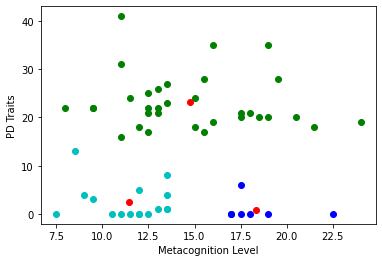

In [6]:
#K Means Clustering 
#Read in the CSV File
data = pd.read_csv('PTSD-cleaned.csv')
#Condense your data set to only the desired columns
#Replace 'LoanAmount' and 'ApplicantIncome' with desired column headers
x = data[['PD_Traits','Metacog']]
#k is your number of clusters, choose how many you think you need
k = 3 
#selects 'k' nubmer of points to act as centroids to clusters
centroids = (x.sample(n=k))
#This assigns all points to the closest centroid, recomputes centroids of new clusters, and repeats. 
#Change diff to a higher number for increased certainty at a trade-off of longer run time
diff = 100 
j = 0 
while diff != 0:
    xd = x 
    i = 1 
    for index1,row_c in centroids.iterrows():
        ED =[] 
        for index2,row_d in xd.iterrows():
            d1 = (row_c['Metacog']-row_d['Metacog'])**2
            d2 = (row_c['PD_Traits']-row_d['PD_Traits'])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        x[i] = ED
        i = i+1 
        
    c = []
    for index,row in x.iterrows():
        min_dist = row[1]
        pos = 1 
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1 
        c.append(pos)
    x['Cluster'] = c 
    centroids_new = x.groupby(['Cluster']).mean()[['PD_Traits','Metacog']]
    if j == 0:
        diff = 100 
        j = j+1 
    else:
        diff = (centroids_new['PD_Traits'] - centroids['PD_Traits']).sum() + (centroids_new['Metacog'] - centroids['Metacog']).sum() 
        print(diff.sum())
    centroids = x.groupby(['Cluster']).mean()[['PD_Traits','Metacog']]
clist = ['c','g','b','y','m']
for k in range(k):
    data=x[x['Cluster']==k+1]
    plt.scatter(data['Metacog'],data['PD_Traits'],c=clist[k])
plt.scatter(centroids['Metacog'],centroids['PD_Traits'],c='r')
plt.xlabel('Metacognition Level')
plt.ylabel('PD Traits')
plt.show() 